In [1]:
!pip install geopandas

In [ ]:
#importing  an ESRI Shapefile and plotting it using Geopandas

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
districts = gpd.read_file("/content/ke_subcounty.zip")

In [ ]:
districts

,country,provpcode,province,ctypcode,county,scpcode,subcounty,dhis2_id,geometry
0,Kenya,KEN_1_1,Coast,KEN_2_1,Mombasa,KEN_3_6,Mvita Sub County,C1xuoa1NAMm,"POLYGON ((39.6776 -4.04654, 39.67773 -4.04659,..."
1,Kenya,KEN_1_7,Nyanza,KEN_2_42,Kisumu,KEN_3_240,Kisumu Central Sub County,OpLt8IgyHop,"POLYGON ((34.76317 -0.12726, 34.76295 -0.12751..."
2,Kenya,KEN_1_3,Eastern,KEN_2_15,Kitui,KEN_3_70,Kitui West Sub County,cmWAJB5kCDW,"POLYGON ((38.03021 -1.23441, 38.03012 -1.23849..."
3,Kenya,KEN_1_6,Western,KEN_2_39,Bungoma,KEN_3_219,Bumula Sub County,jkQZEow83MX,"POLYGON ((34.52783 0.50833, 34.52831 0.50798, ..."
4,Kenya,KEN_1_7,Nyanza,KEN_2_42,Kisumu,KEN_3_244,Nyakach Sub County,kBQIjtWUBqj,"POLYGON ((35.00564 -0.33966, 35.00569 -0.33964..."
...,...,...,...,...,...,...,...,...,...
299,Kenya,KEN_1_3,Eastern,KEN_2_16,Machakos,None,Kalama Sub County,pJDgmrxMQTn,"POLYGON ((37.35751 -1.52616, 37.35753 -1.52645..."
300,Kenya,KEN_1_3,Eastern,KEN_2_16,Machakos,KEN_3_81,Machakos Sub County,KXc4ez8OAFz,"POLYGON ((37.14068 -1.5639, 37.14131 -1.55821,..."
301,Kenya,KEN_1_2,North Eastern,KEN_2_9,Mandera,None,Kutulo Sub County,iGFdm333PJ2,"POLYGON ((40.69359 2.77733, 40.69443 2.77617, ..."
302,Kenya,KEN_1_2,North Eastern,KEN_2_9,Mandera,KEN_3_42,MANDERA SOUTH,qyhVIMG2rUw,"POLYGON ((41.02655 3.04799, 41.02692 3.04804, ..."


In [7]:
type(districts)

geopandas.geodataframe.GeoDataFrame

<Axes: >

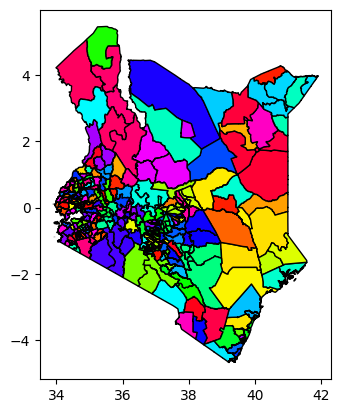

In [8]:
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'subcounty')

In [10]:
country = gpd.read_file('/content/ken_admbnda_adm0_iebc_20180607.zip')
atmspoint = gpd.read_file('/content/hotosm_ken_financial_services_points_shp.zip')
atmspolygon = gpd.read_file('/content/hotosm_ken_financial_services_polygons_shp.zip')
migori = gpd.read_file('/content/migori.zip')

In [ ]:
country

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry
0,44.052413,48.098756,Kenya,KE,None,None,None,2017-11-03,2018-06-07,NaT,"MULTIPOLYGON (((39.22308 -4.66901, 39.22034 -4..."


<Axes: >

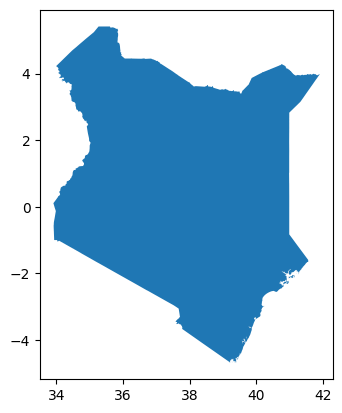

In [11]:
country.plot()

In [ ]:
#ploting figures side by side

<Axes: >

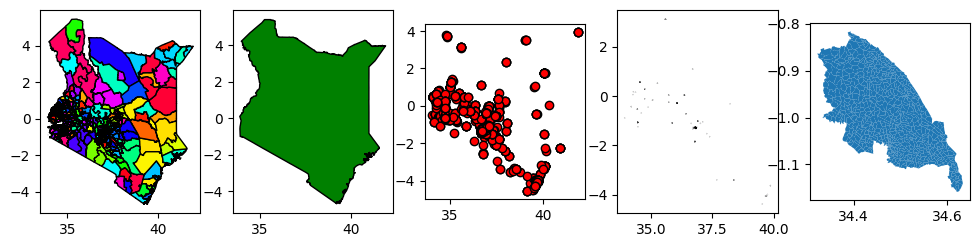

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, figsize = (12, 10))
districts.plot(ax = ax1, cmap = 'hsv', edgecolor = 'black', column = 'subcounty')
country.plot(ax = ax2, color = 'green', edgecolor = 'black')
atmspoint.plot(ax = ax3, color = 'red', edgecolor = 'black')
atmspolygon.plot(ax = ax4, color = 'blue', edgecolor = 'black')
migori.plot(ax = ax5)

Plotting multiple layers on top of another

In [ ]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

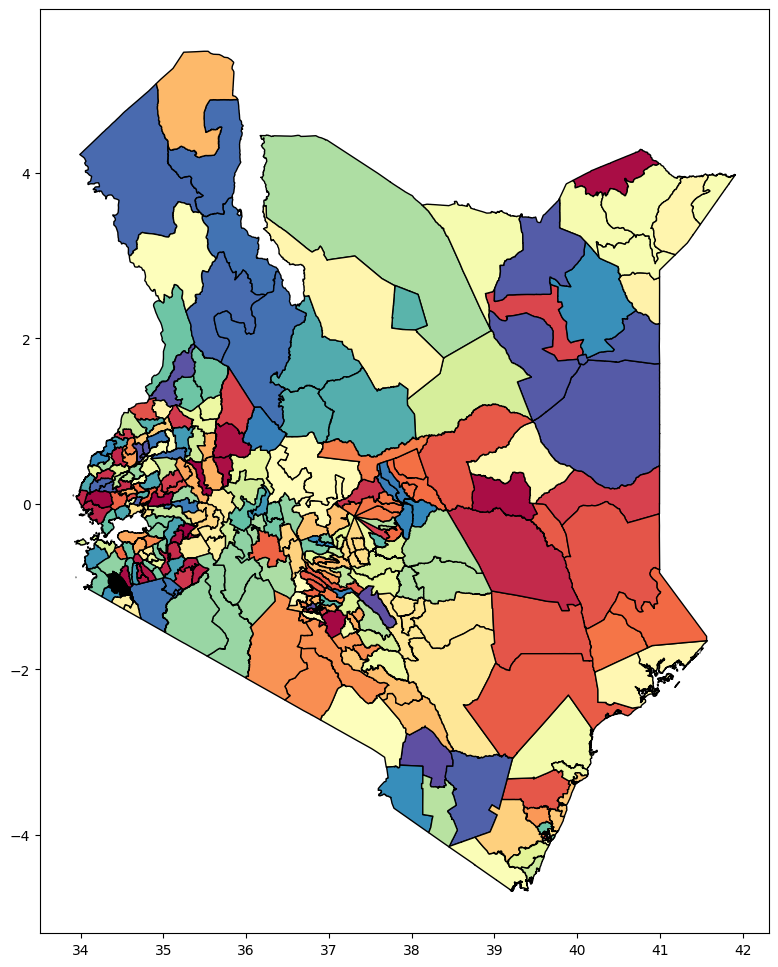

In [13]:
fig, ax = plt.subplots(figsize = (10, 12))
districts.plot(ax = ax, cmap = 'Spectral', edgecolor = 'black', column = 'subcounty')
migori.plot(ax = ax, color = 'red', edgecolor = 'black')

Reprojecvting Geopandas GeodataFrames

<Axes: >

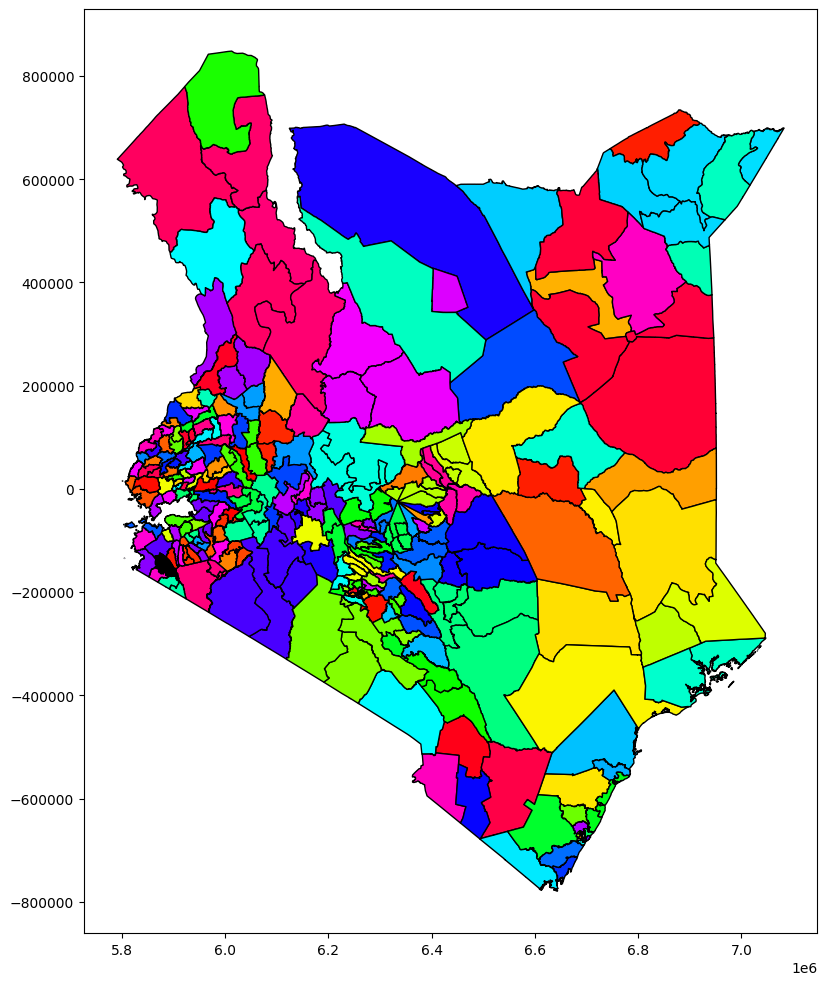

In [14]:
fig, ax = plt.subplots(figsize = (10, 12))
district = districts.to_crs(epsg = 32629)
district.plot(ax = ax, figsize = (10,8), cmap = 'hsv', edgecolor = 'black', column = 'subcounty')
migori = migori.to_crs(epsg = 32629)
migori.plot(ax = ax, figsize = (10,8), color = 'none', edgecolor = 'black')

  Intersecting layers

In [15]:
district_migori = gpd.overlay(district, migori, how = 'intersection')

<Axes: >

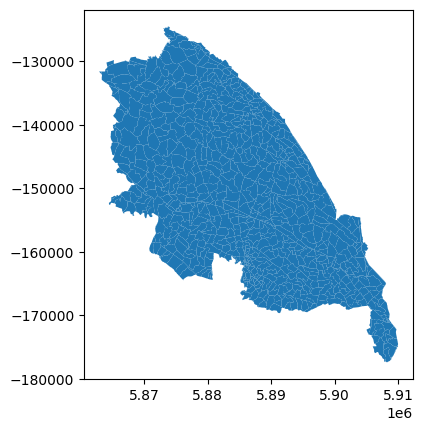

In [16]:
district_migori.plot()